# Load MNIST Dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)

# Import the libraries

In [55]:
import numpy as np
# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# performance measures 
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score

## confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

## precision and recall
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
X,y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


# Simple Exploratory Dataset

In [4]:
ex_digit = X[0]
ex_digit.shape

(784,)

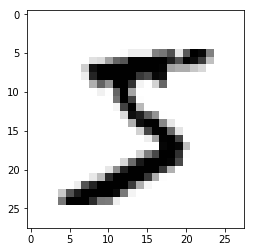

In [5]:
ex_digit_im = ex_digit.reshape(28,28)
plt.imshow(ex_digit_im, cmap = mpl.cm.binary, interpolation ="nearest")
plt.show()

In [6]:
y[0] # check label of X[0]

'5'

In [7]:
ex_digit.shape

(784,)

In [8]:
y = y.astype(np.uint8)

# Training by Using Stochastic Gradient Descent Classifier

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [12]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
#sgd_classifier = []
sgd_classifier = SGDClassifier(random_state = 42 )
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_classifier.predict([ex_digit])

array([ True])

# Performance Measures:
## Measuring Accuracy Using Cross-Validation

In [13]:
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

</b> The accuracy is really high but it is really that accurate ? 

In [14]:
num_of_5_in_dataset = np.sum(y_train_5)/len(y_train_5)*100
print("Percentage of number 5 in dataset: " +  str(num_of_5_in_dataset) + "%")

Percentage of number 5 in dataset: 9.035%


</b> There is only 9% of number 5 in dataset, and that means that if our model predict Not Number 5 (False) every time, we still can get about 90-91% of accuracy. This result shows that Accuracy Method is not preferred performance measure for classifiers or at least with skewed dataset. </b>

</b> Confusion matrix will be used for Performance measure </b>

## Confusion Matrix

In [15]:
# obtain set of prediction from SGDClassifier
y_train_predict = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

In [16]:
confusion_matrix(y_train_5,y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

</b> Note: Top row of the array above is Negative (predict non-5), and second row is Positive (predict 5)

In [17]:
precision_score(y_train_5, y_train_predict) ## accuracy is 83%

0.8370879772350012

In [18]:
recall_score(y_train_5, y_train_predict) ## recall or also sensitivity or true positive rate
# the SGDclassifier only predict correctly 65% of number 5 in dataset

0.6511713705958311

In [19]:
f1_score(y_train_5, y_train_predict)

0.7325171197343846

## Precision and Recall
</b> Precision and Recall TradeOff: Create a graph for Precision and Recall distribution </b> 

In [20]:
y_score = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3, method="decision_function")
y_score

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [21]:
from sklearn.metrics import precision_recall_curve

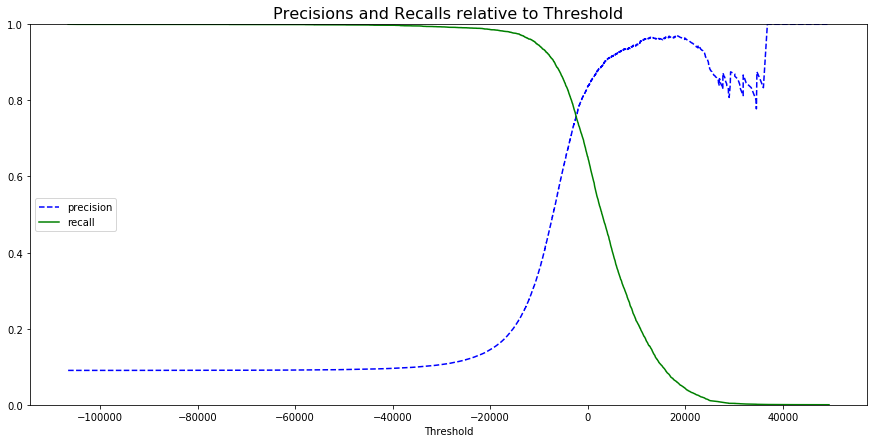

In [22]:
#def PR_threshold_plot(y_train_of_digit, score_of_y):    
    precision, recall, threshold = precision_recall_curve(y_train_5, y_score)
    plt.figure(figsize=(15,7))
    plt.plot(threshold, precision[:-1], "b--", label="precision")
    plt.plot(threshold, recall[:-1], "g-", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    plt.title("Precisions and Recalls relative to Threshold", fontsize = 16)
    plt.show()

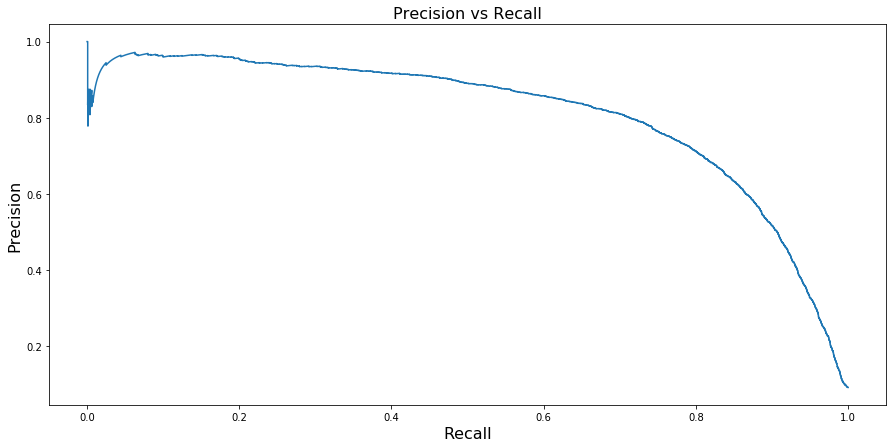

In [23]:
plt.figure(figsize=(15,7))
plt.plot(recall[:-1], precision[:-1])
plt.xlabel("Recall",fontsize = 16)
plt.ylabel("Precision",fontsize = 16)
plt.title("Precision vs Recall", fontsize = 16)
plt.show()

In [24]:
y_pred_90 = (y_score > 2000)
print("Precision score: "+str(precision_score(y_train_5 , y_pred_90)))
print("Recall score: " + str(recall_score(y_train_5 , y_pred_90)))

Precision score: 0.8776849642004774
Recall score: 0.5427042980999816


## Receiver Operating Characteristic (ROC)

In [25]:
from sklearn.metrics import roc_curve

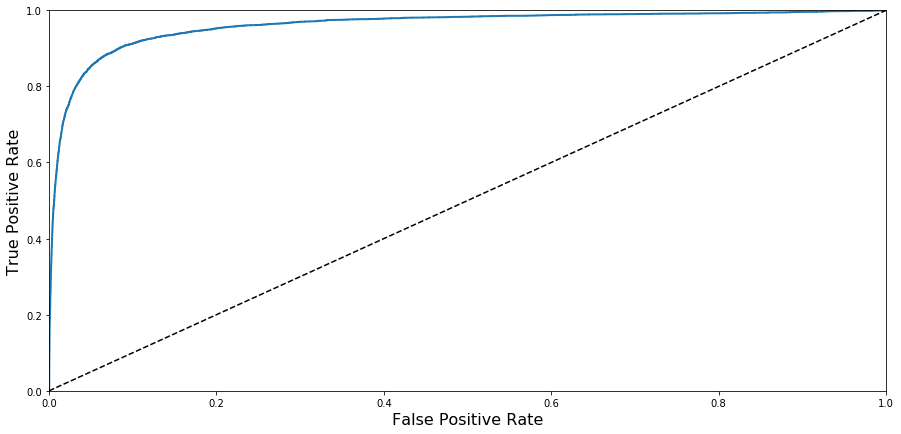

In [26]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_score)
plt.figure(figsize=(15,7))
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0, 1],[0, 1], 'k--')
plt.axis([0,1,0,1])
plt.ylabel("True Positive Rate",fontsize = 16)
plt.xlabel("False Positive Rate",fontsize = 16)
plt.show()

In [27]:
#Area under the curve of ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_score)

0.9604938554008616

## Note:
</b> The ROC_AUC ( area under curve of ROC ) is close to 1, which shows that the classifier has high true positive result. However, the questions is if this is reliable result. But in fact, this happen because there are only a few postive 5s compared to negative (non-5)

### _Notice_:
   __Use PR curve when positive class is rare or when care more about false positives than false negatives. ROC: care more about false negative than false positive.__
    

</b> Let's try RandomForestClassifier and inspect its perfomance </b> 

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(random_state = 42)
y_probability_forest = cross_val_predict(forest_classifier, X_train, y_train_5, cv=3, method="predict_proba")
y_probability_forest

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       ...,
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ]])

In [29]:
y_score_forest = y_probability_forest[:,1]

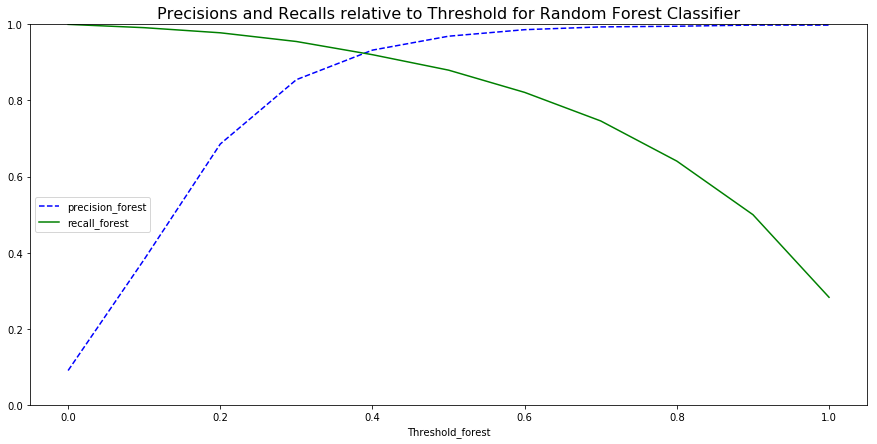

In [30]:
precision_forest, recall_forest, threshold_forest = precision_recall_curve(y_train_5, y_score_forest)
plt.figure(figsize=(15,7))
plt.plot(threshold_forest, precision_forest[:-1], "b--", label="precision_forest")
plt.plot(threshold_forest, recall_forest[:-1], "g-", label="recall_forest")
plt.xlabel("Threshold_forest")
plt.legend(loc="center left")
plt.ylim([0,1])
plt.title("Precisions and Recalls relative to Threshold for Random Forest Classifier", fontsize = 16)
plt.show()

## ROC of Random Forest Classifier

In [31]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_score_forest)
#fpr_forest
#tpr_forest
threshold_forest

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

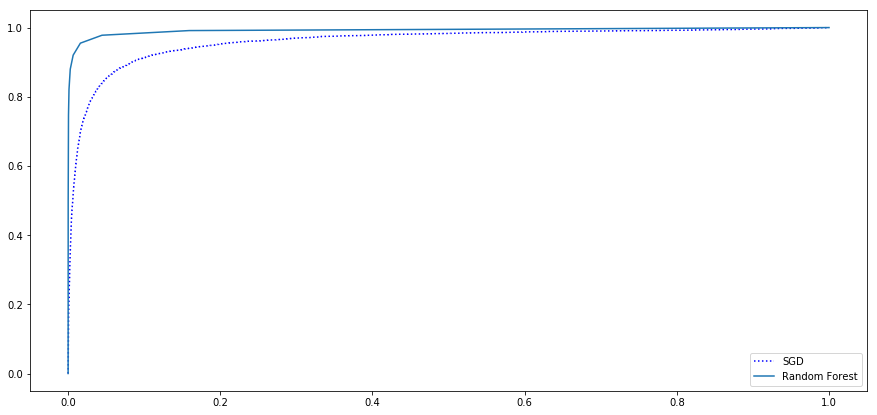

In [32]:
plt.figure(figsize=(15,7))
plt.plot(fpr, tpr, "b:", label = "SGD" )
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right")
plt.show()

In [33]:
roc_auc_score(y_train_5, y_score_forest)

0.9920527492698306

## Sample Input Function (for fun)

In [108]:
from numpy import*
from skimage.transform import resize
from PIL import Image
def sample_input_ml():  
    #im = imread("digit_5_second.png")
    
    ## convert 3D array into 2D or RGB to grayscale
    temp=Image.open('digit_5_second.png')
    temp=temp.convert('1')      # Convert to black&white
    A = array(temp)             # Creates an array, white pixels==True and black pixels==False
    new_A=empty((A.shape[0],A.shape[1]),None)    #New array with same size as A
     
    for i in range(len(A)):
        for j in range(len(A[i])):
            if A[i][j]==True:
                new_A[i][j]=0
            else:
                new_A[i][j]=1
                
    ## resize grayscale into 28x28
    i_width = 28
    i_height = 28
    pic = resize(new_A, (i_height, i_width))
    
    plt.imshow(pic, cmap = mpl.cm.binary, interpolation ="nearest")
    plt.show()
    
    pic = np.reshape(pic,(784))
    return pic

sample_input = sample_input_ml()
print(sgd_classifier.predict([sample_input]))
forest_classifier.fit(X_train, y_train_5)
print(forest_classifier.predict([sample_input]))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


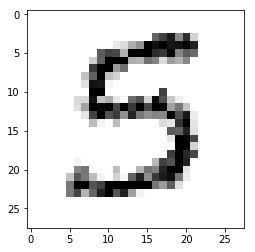

array([ True])

array([False])

## Muticlass Classification

- ### Directly use SGD classifier 

</b> By using Scikit-Learn , the binary classification will automatically run OvA or One vs All method ( except SVM - Support Vector Machine because it use OvO method.  </b>

#### SGD classifier

In [36]:
sgd_clf = SGDClassifier( random_state = 42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([ex_digit])

array([3], dtype=uint8)

In [46]:
digit_score = sgd_clf.decision_function([ex_digit])
#digit_score
print("The class of ex variable is : " + str(np.argmax(digit_score)))
sgd_clf.classes_


The class of ex variable is : 3


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Random Forest Classifier 

In [53]:
### Random forest 
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([ex_digit])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5], dtype=uint8)

In [59]:
decision_proba = forest_clf.predict_proba([ex_digit])
print("The class of ex_digit variable is : " + str(np.argmax(decision_proba)))

The class of ex_digit variable is : 5


In [72]:
print("Probability for each class: ")
for i in range(len(decision_proba[0])):
    print ("Class label " + str(i) + ": " + str(decision_proba[0,i]*100) + '%')

Probability for each class: 
Class label 0: 0.0%
Class label 1: 0.0%
Class label 2: 0.0%
Class label 3: 20.0%
Class label 4: 0.0%
Class label 5: 80.0%
Class label 6: 0.0%
Class label 7: 0.0%
Class label 8: 0.0%
Class label 9: 0.0%


#### Evaluation 

- #### SGD classifier:

In [74]:
cross_val_score( sgd_clf, X_train, y_train, cv= 3, scoring = "accuracy")

array([0.87082583, 0.87089354, 0.88628294])

</b> SDG accuracy can be improve to be better than 87% by scaling the input </b>

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score( sgd_clf, X_train_scaled, y_train, cv= 3, scoring = "accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

</b> as we all can see, the accuracy of SDG is increasing about 2% after the input is scaled </b>

- #### Random forest classifier:

In [75]:
cross_val_score( forest_clf, X_train, y_train, cv= 3, scoring = "accuracy")

array([0.94116177, 0.93949697, 0.94374156])

#### Test a  example from test set

In [94]:
sgd_clf.fit(X_train_scaled, y_train)
forest_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

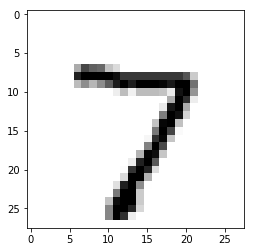

In [124]:
sample_input = X_test[0].reshape(28,28)
plt.imshow(sample_input, cmap = mpl.cm.binary)
plt.show()

In [138]:
sample_input = X_test[0].reshape(784)
print( "Prediction of SGD classifier : " + str(sgd_clf.predict([sample_input])) )
print( "Prediction of Random Forest classifier : " + str( forest_clf.predict([sample_input]) ) )

Prediction of SGD classifier : [7]
Prediction of Random Forest classifier : [8]


#### Saving the classifier by using pickle

In [133]:
import pickle

with open("SGD_classifier.pkl", "wb") as f:
    pickle.dump(sgd_clf,f)

In [139]:
# reload classifier 
with open("SGD_classifier.pkl","rb") as file:
    sgd = pickle.load(file)
    
sgd.predict([sample_input])   

array([7], dtype=uint8)

### Error Analysis 

In [140]:
y_train_pred = cross_val_predict(sgd_clf , X_train_scaled, y_train , cv= 3)
con_matrix = confusion_matrix(y_train, y_train_pred)
con_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]])

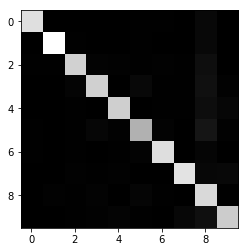

In [141]:
plt.imshow(con_matrix, cmap = plt.cm.gray)
plt.show()

In [147]:
row_sums = con_matrix.sum(axis = 1,keepdims = True)
norm_con_matrix = con_matrix / row_sums
norm_con_matrix

array([[9.41414824e-01, 0.00000000e+00, 3.54550059e-03, 1.01300017e-03,
        1.51950025e-03, 7.25983454e-03, 6.24683437e-03, 1.01300017e-03,
        3.78186730e-02, 1.68833361e-04],
       [0.00000000e+00, 9.48976565e-01, 5.63630970e-03, 3.41145061e-03,
        5.93295758e-04, 6.52625334e-03, 5.93295758e-04, 1.18659152e-03,
        3.15929991e-02, 1.48323939e-03],
       [4.36388050e-03, 4.53172205e-03, 8.79825445e-01, 1.51057402e-02,
        1.19167506e-02, 4.36388050e-03, 1.04061766e-02, 6.04229607e-03,
        6.22692179e-02, 1.17489090e-03],
       [3.91453270e-03, 2.77279400e-03, 1.90833469e-02, 8.51410863e-01,
        3.26211059e-04, 3.39259501e-02, 4.56695482e-03, 6.52422117e-03,
        6.60577394e-02, 1.14173870e-02],
       [2.05409106e-03, 2.39643958e-03, 8.21636426e-03, 1.71174255e-03,
        8.88736734e-01, 1.71174255e-03, 6.16227319e-03, 4.45053064e-03,
        5.64875043e-02, 2.80725779e-02],
       [5.16509869e-03, 2.76701716e-03, 6.08743774e-03, 3.06216565e-02,
   

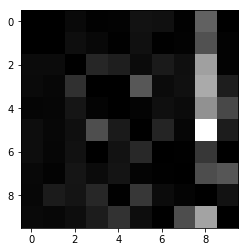

In [152]:
np.fill_diagonal(norm_con_matrix, 0)
plt.imshow(norm_con_matrix, plt.cm.gray)
plt.show()

__</b>Need to spend more to improve classifier on number 8 </b>__

In [167]:
#cl_a, cl_b = 3,5
#X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
#X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
#X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
#X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

#plt.figure(figsize = (8,8))

#plt.subplot(221); 
#plt.imshow(X_aa[:25], aspect = 'auto')#, images_per_row = 5)
#plt.subplot(222); plt.imshow(X_ab[:25], aspect = 'auto')#, images_per_row = 5)
#plt.subplot(223); plt.imshow(X_ba[:25], aspect = 'auto')#, images_per_row = 5)
#plt.subplot(224); plt.imshow(X_bb[:25], aspect = 'auto')#, images_per_row = 5)
#plt.show()